In [1]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_rows', None)  # or 1000

In [2]:

data_csv =  sorted(str(p) for p in pathlib.Path("C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop").glob("*.csv"))

# data_csv = data_csv[1:-1]
print(len(data_csv))

data_csv = sorted(data_csv , key=lambda x: int(x.split('_')[-1].split('.')[0]))
data_csv

17


['C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_0.csv',
 'C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_1.csv',
 'C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_2.csv',
 'C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_3.csv',
 'C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_4.csv',
 'C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_5.csv',
 'C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_6.csv',
 'C:\\Users\\USER\\Desktop\\Paris Saclay\\These\\4_DATA\\data_exp_2_pf\\1_data_clean_v1\\mean_prop\\mean_prop_subj_7.csv',
 'C:\\Users\\USE

In [3]:
# data_csv = data_csv[1:-1]

In [4]:
# data_l = []
def data_list (data_csv):
    data_l = []
    for elem in data_csv:
        data = pd.read_csv(elem, header=0, sep=';')
        data_l.append(data)
    return data_l

In [5]:
data_l =  data_list(data_csv)

In [6]:
data_l[0].shape

(48, 6)

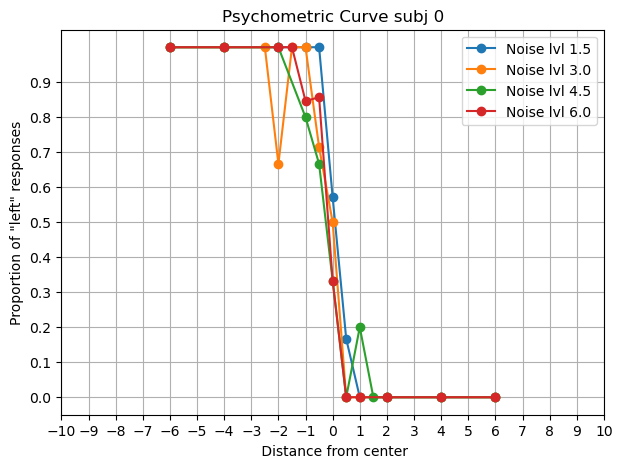

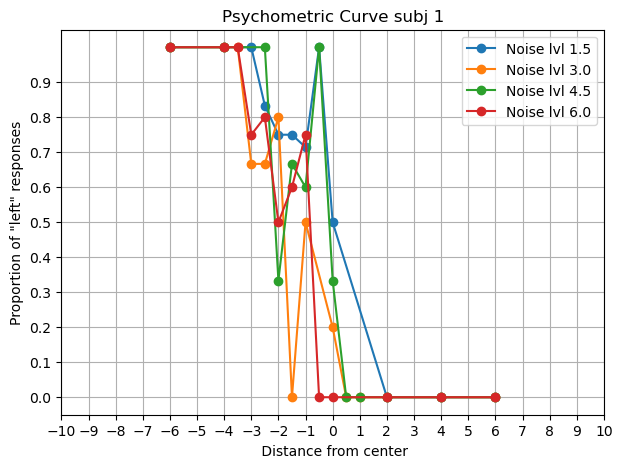

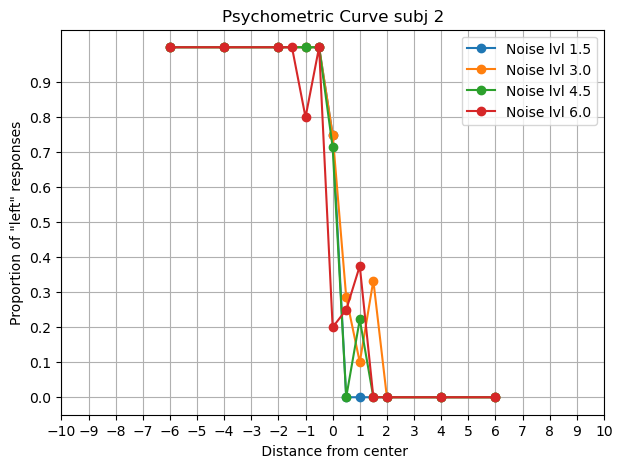

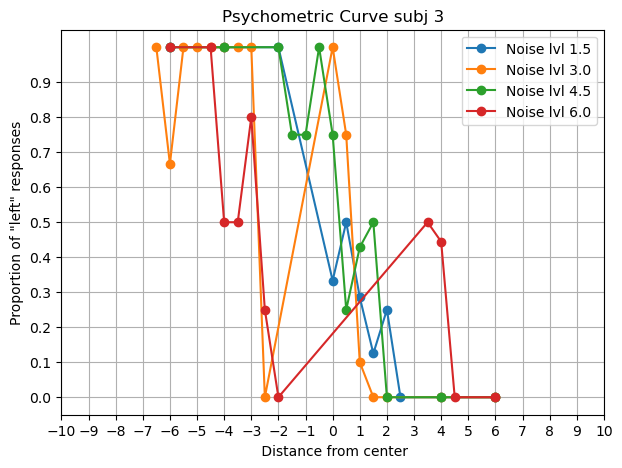

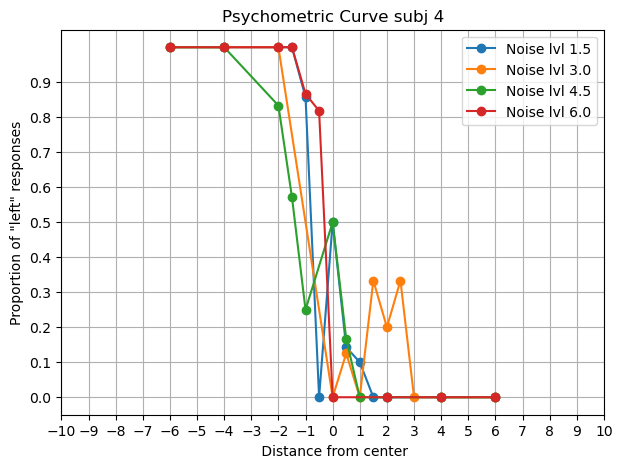

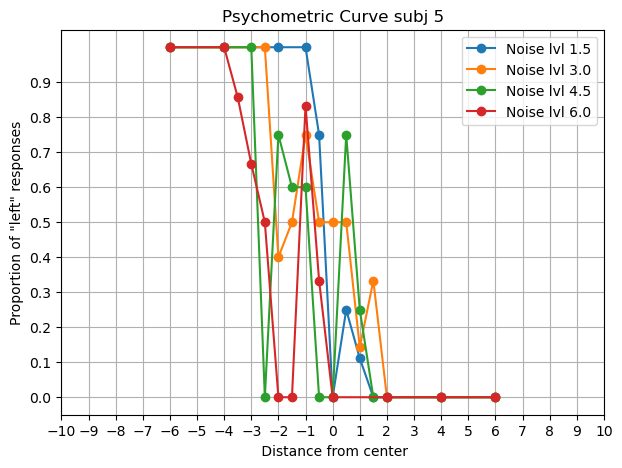

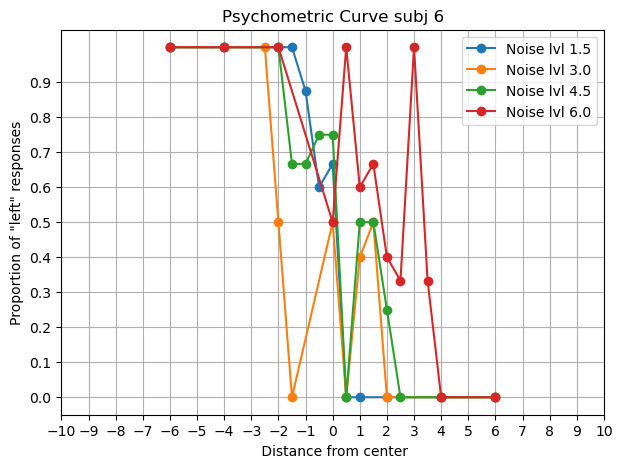

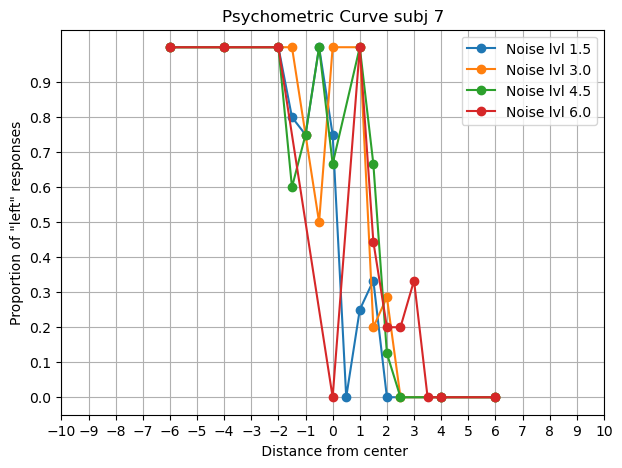

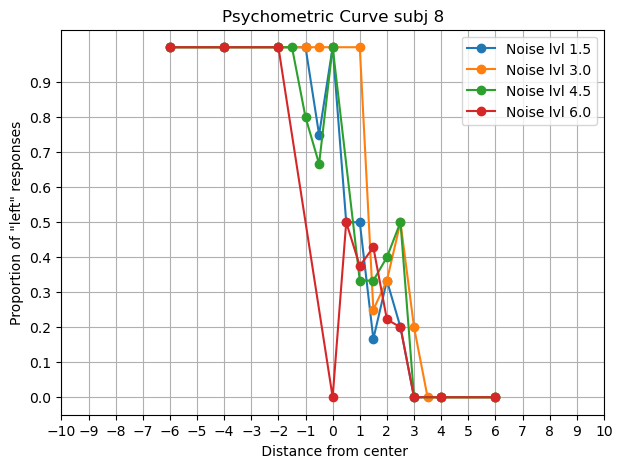

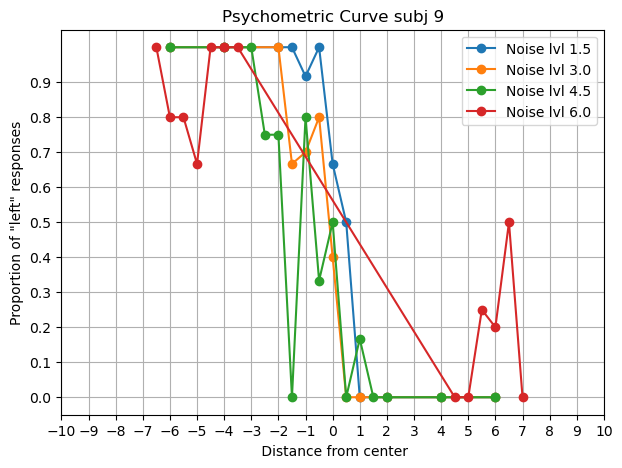

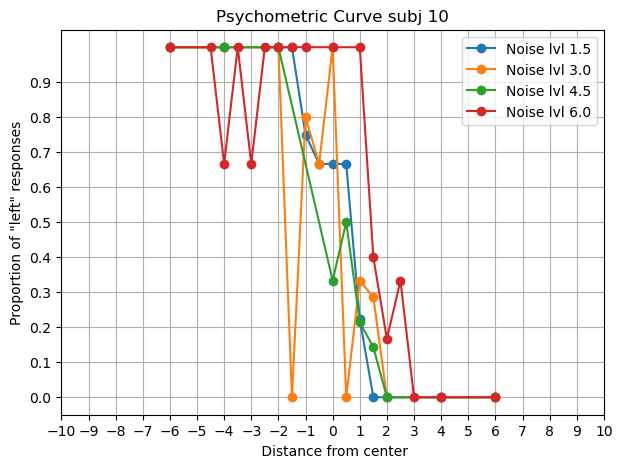

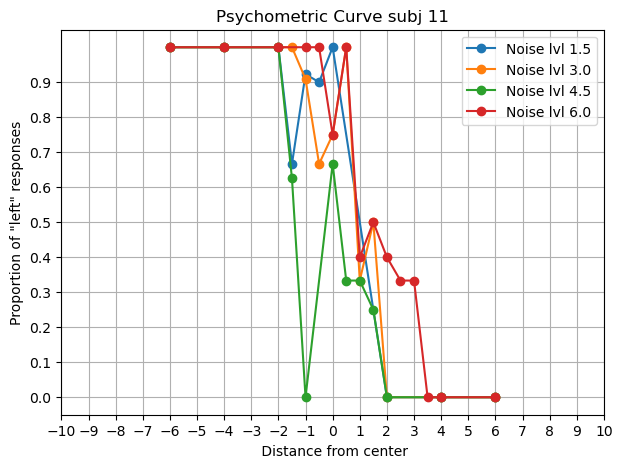

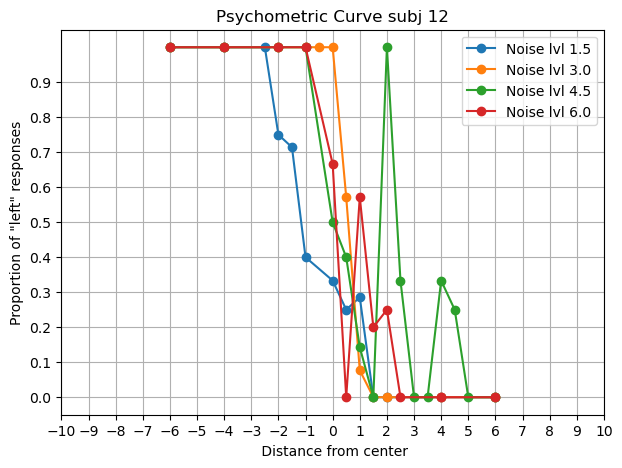

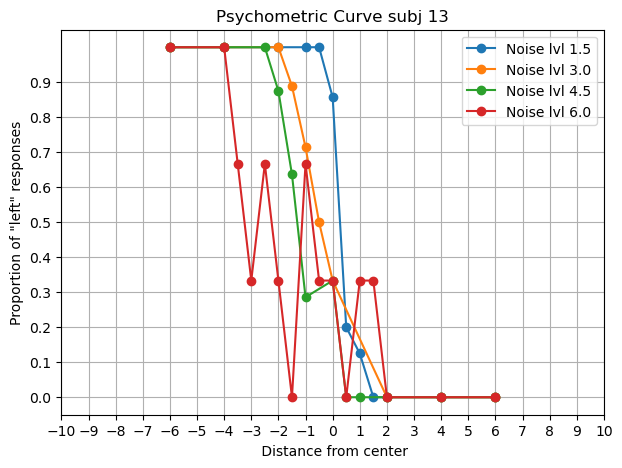

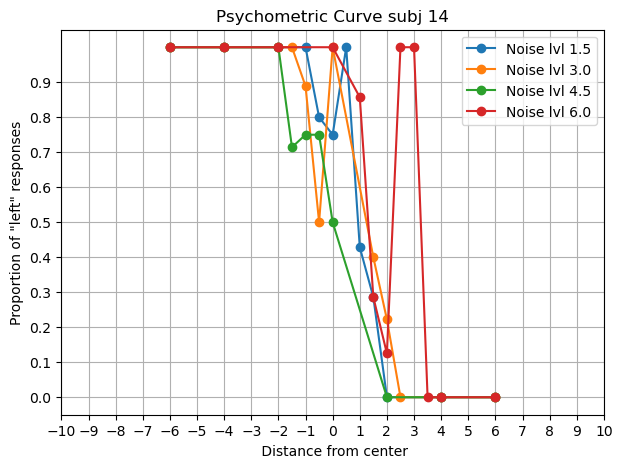

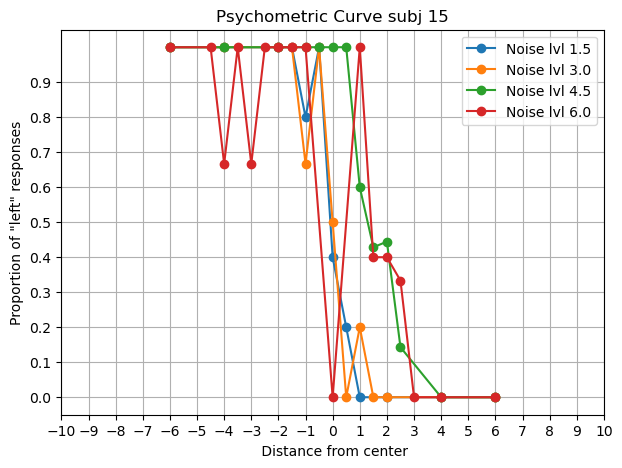

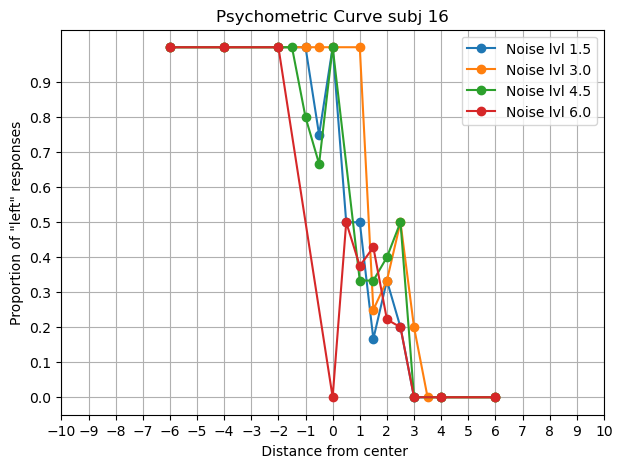

In [7]:

for elem in range(len(data_l)):
    data= data_l[elem]
        # group by (noise_lvl) and distance from center (slope)
    grouped = data.groupby(['noise_lvl'])
    unique_noise_levels = grouped['noise_lvl'].unique()
    fig =plt.figure(figsize=(7, 5))
    for noise_lvl, data_group in grouped:

        plt.plot(data_group['slope'], data_group['prop_left'],  label=f'Noise lvl {noise_lvl}', marker='o',)
#             plt.scatter(slope_values, prop_left_values, label=f'Noise lvl {noise}', marker='o', s=30)
    plt.xlabel(' Distance from center')
    plt.ylabel('Proportion of "left" responses')
    plt.title(f'Psychometric Curve subj {elem}')
    plt.legend(title='Noise lvl')
    plt.grid(True)

        # plt.scatter(data['slope'], data['prop_left'], color='b', label='real', marker='x', s=30)
    plt.xticks(range(-10, 11, 1))
    plt.yticks(np.arange(0, 1, 0.1))

    plt.legend()
    plt.show()

In [8]:
# Define the psychometric function
def psychometric_function(stimulus, PSE, JND):
    return 1 / (1 + np.exp((stimulus - PSE) / JND)) ## threshold, slope = PSE, JND
# def psychometric_function(x, PSE, JND):
#     return 1 / (1 + np.exp((JND * (x - PSE))))

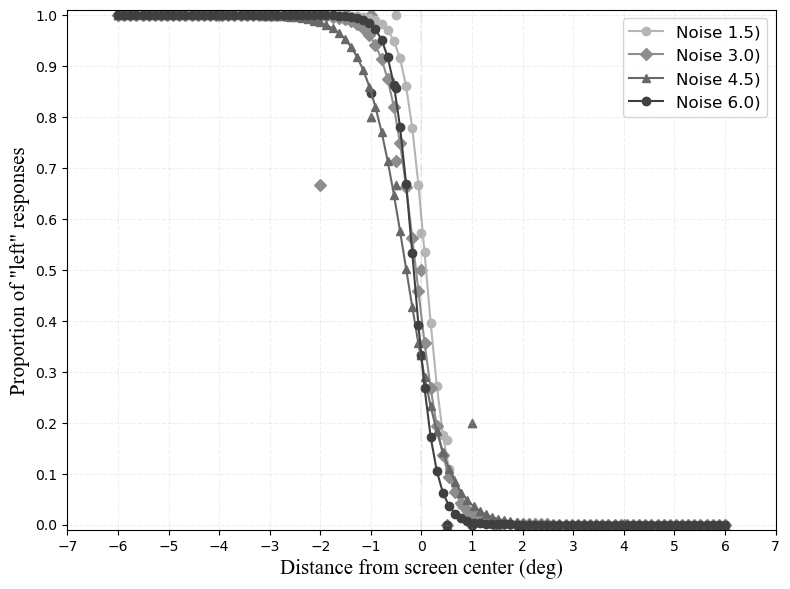

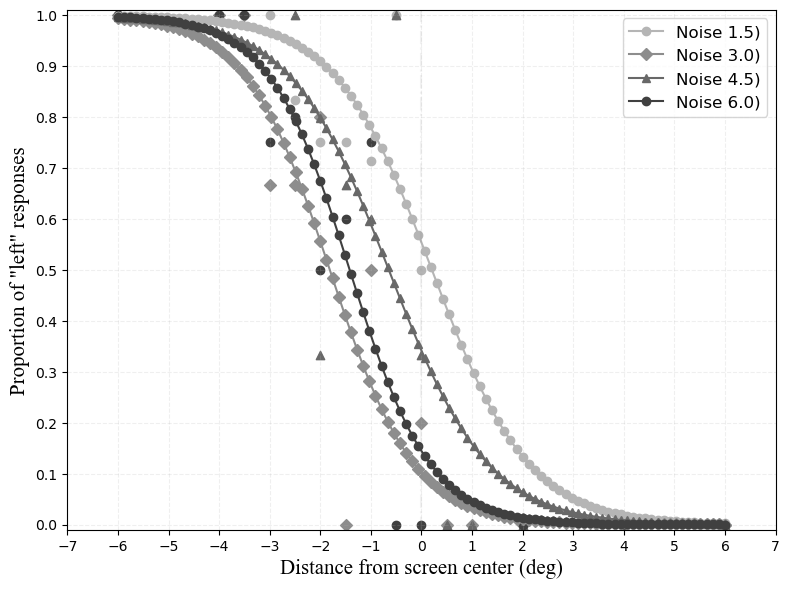

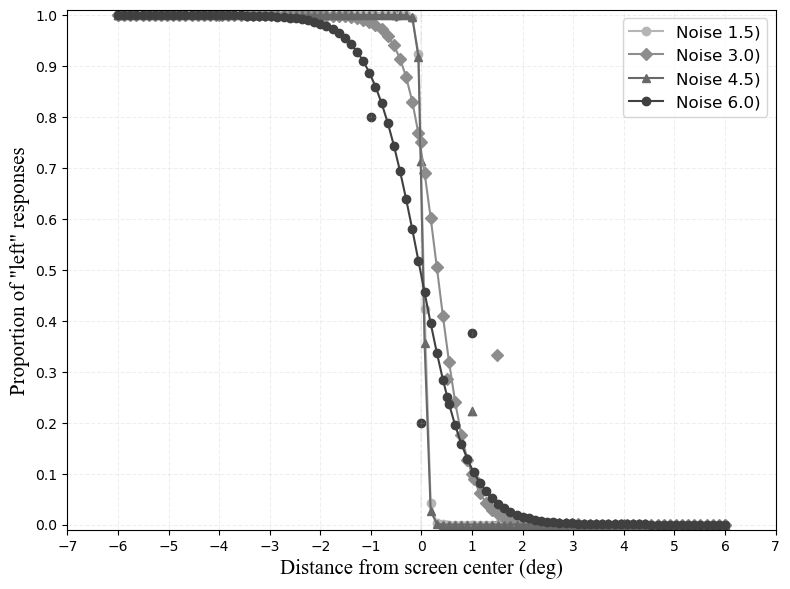

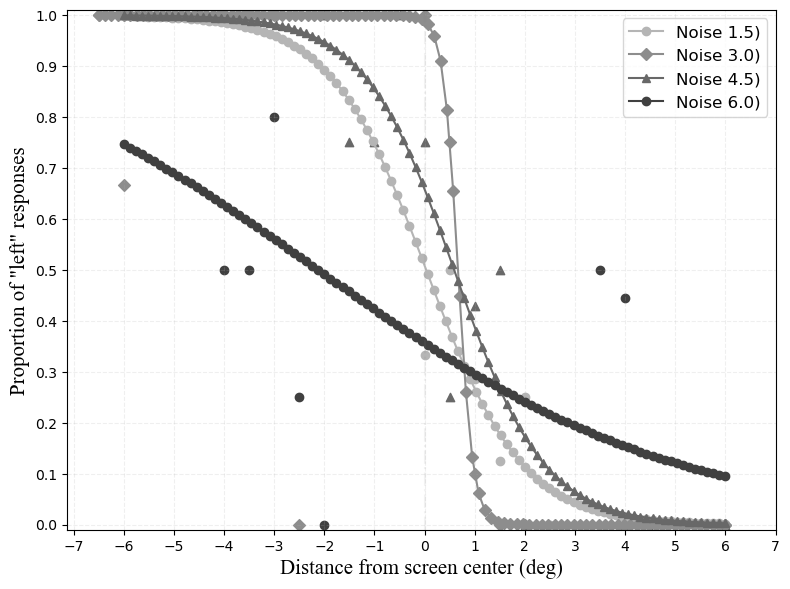

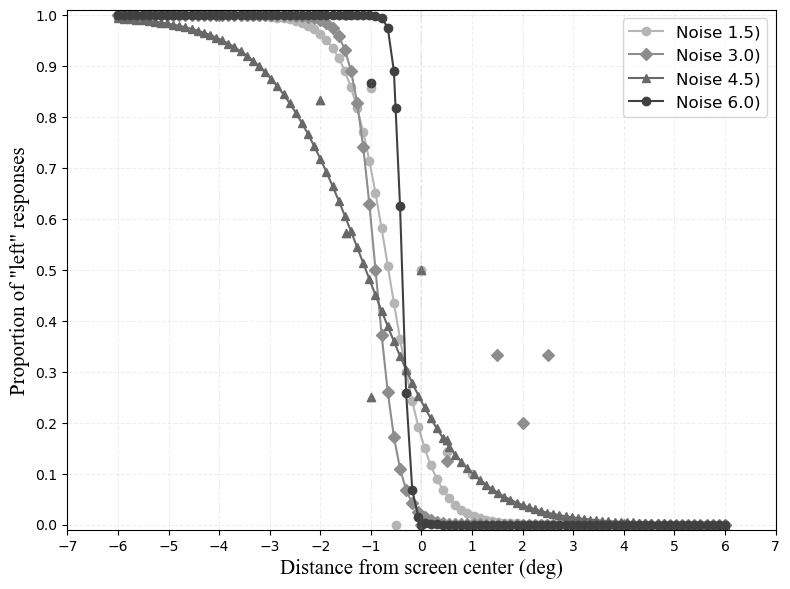

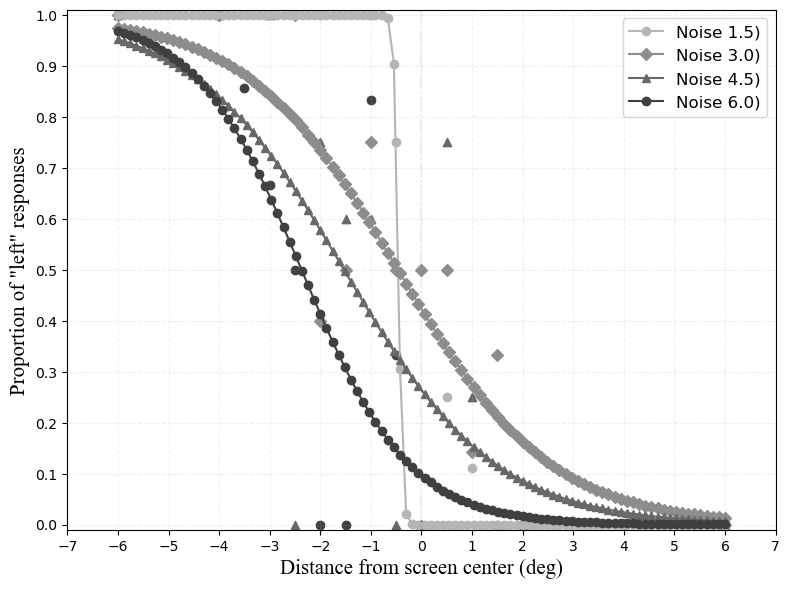

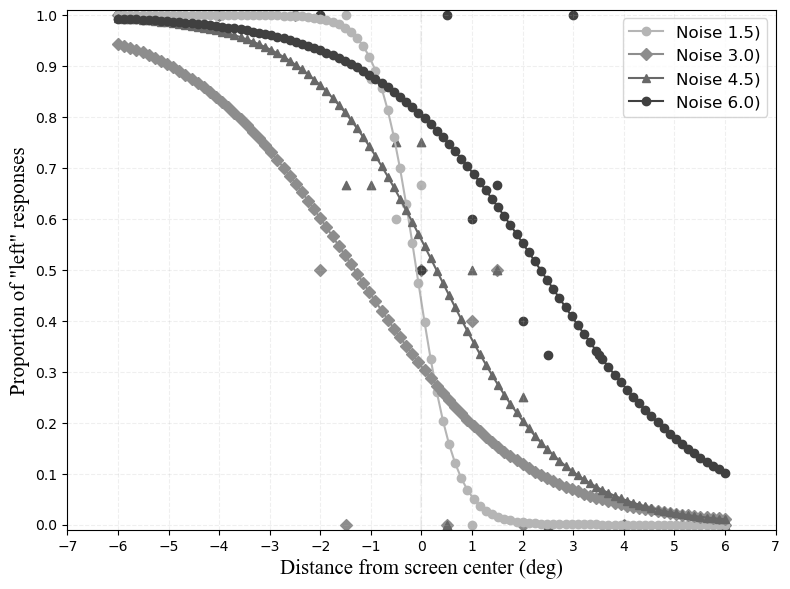

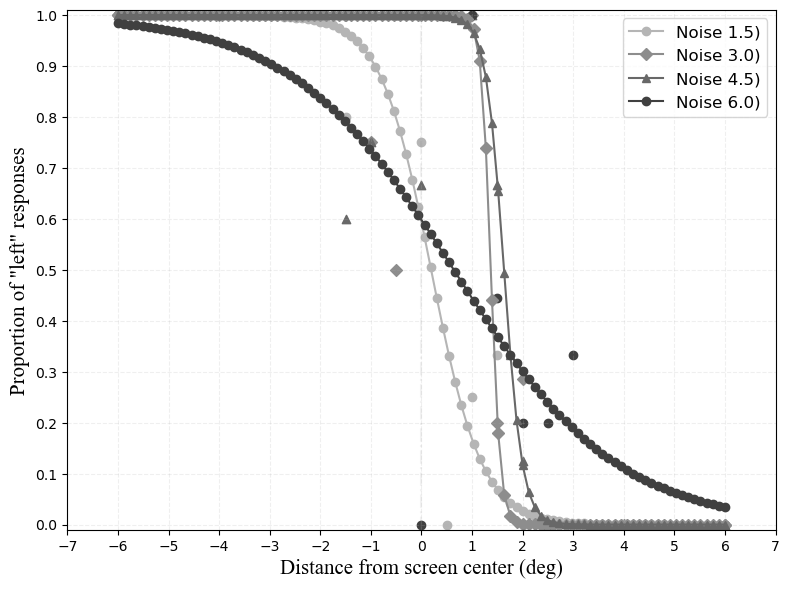

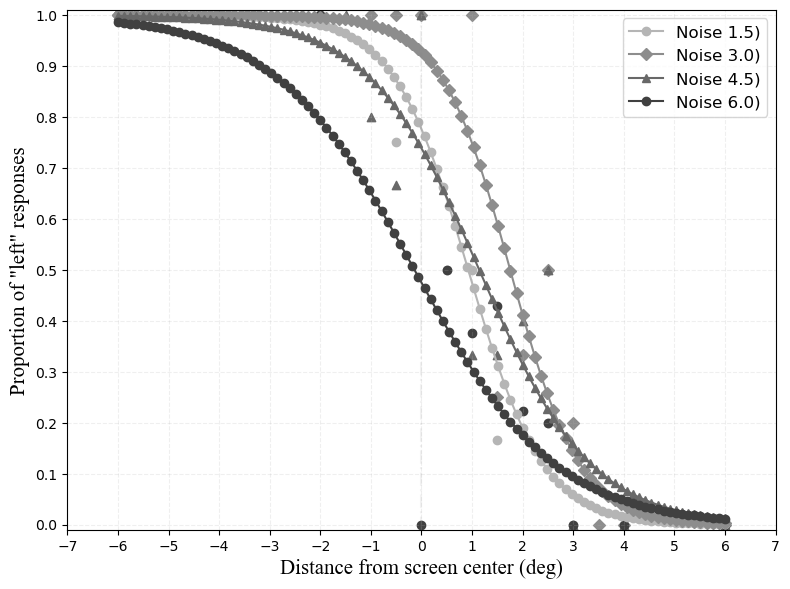

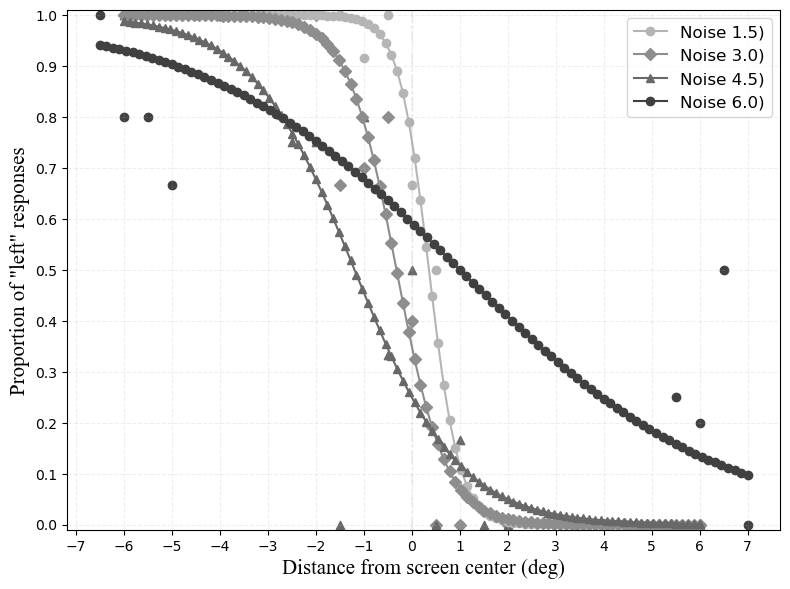

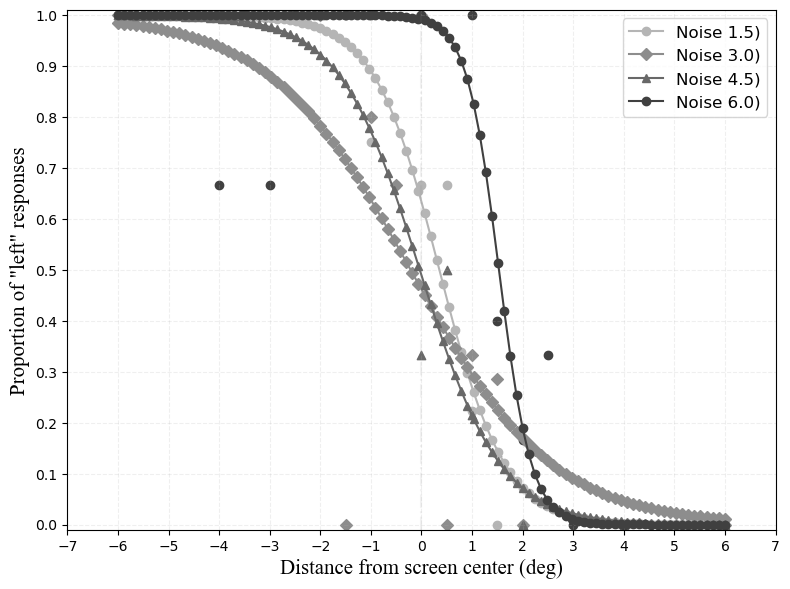

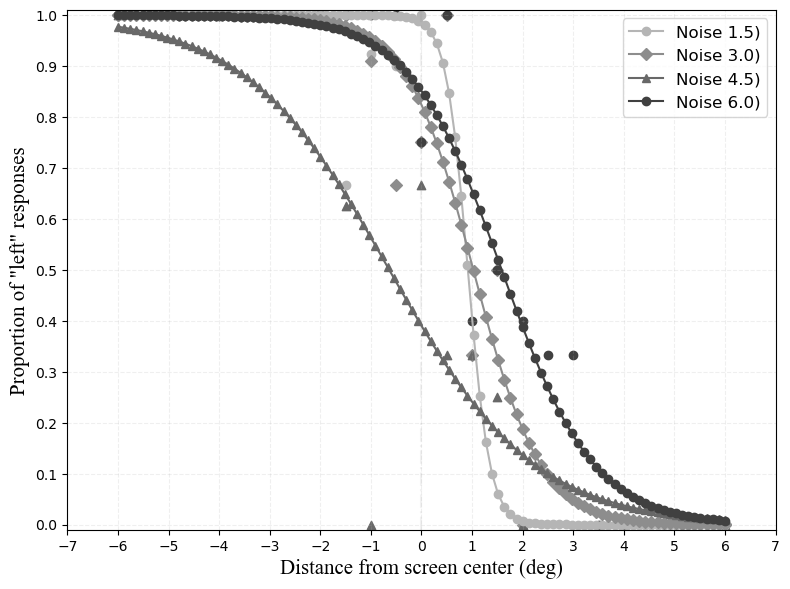

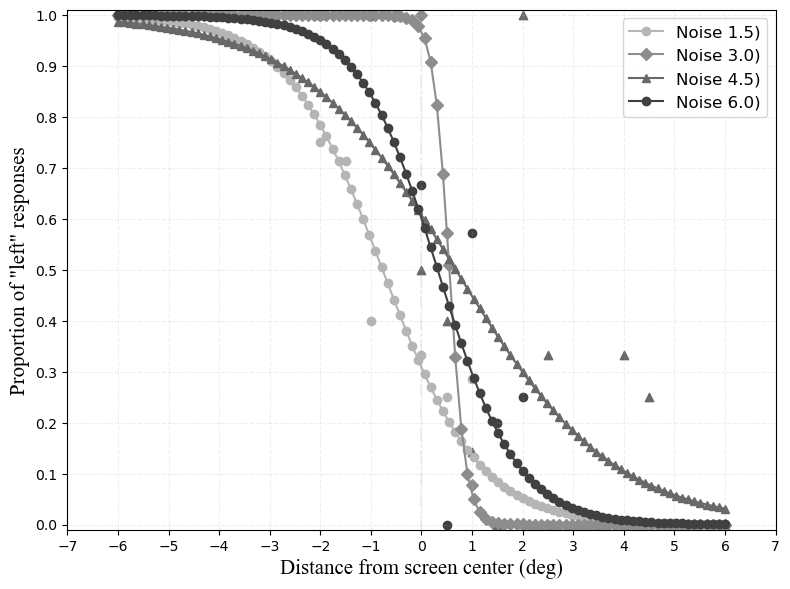

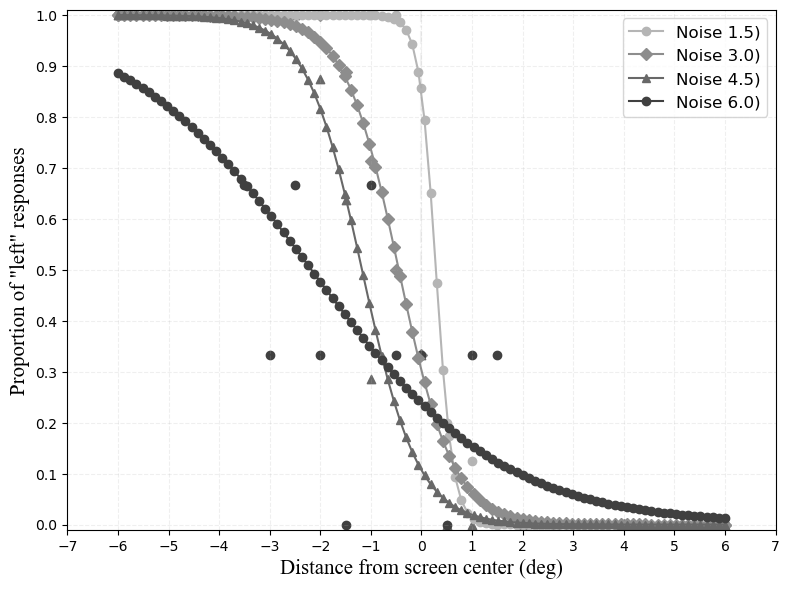

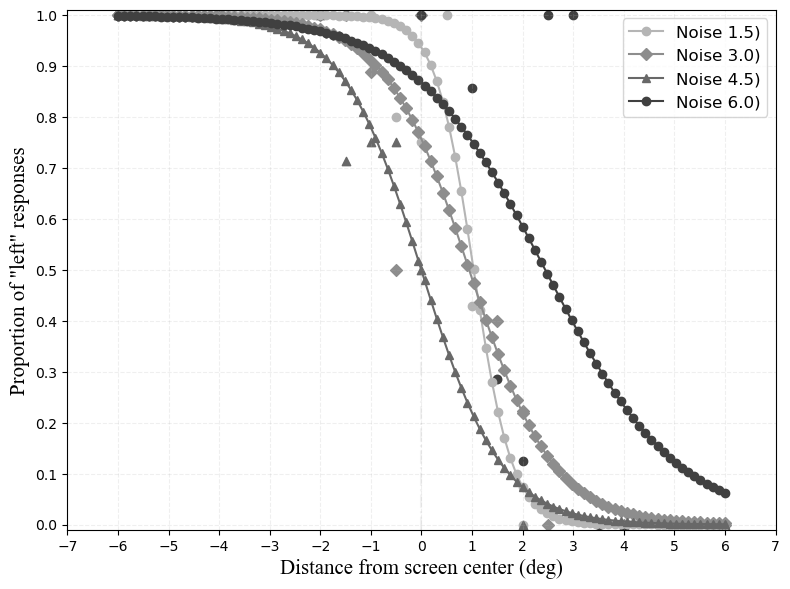

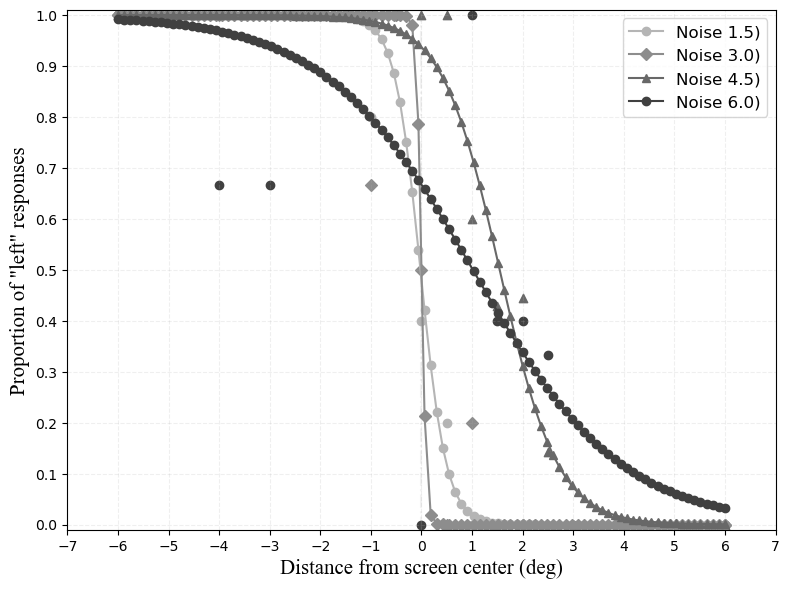

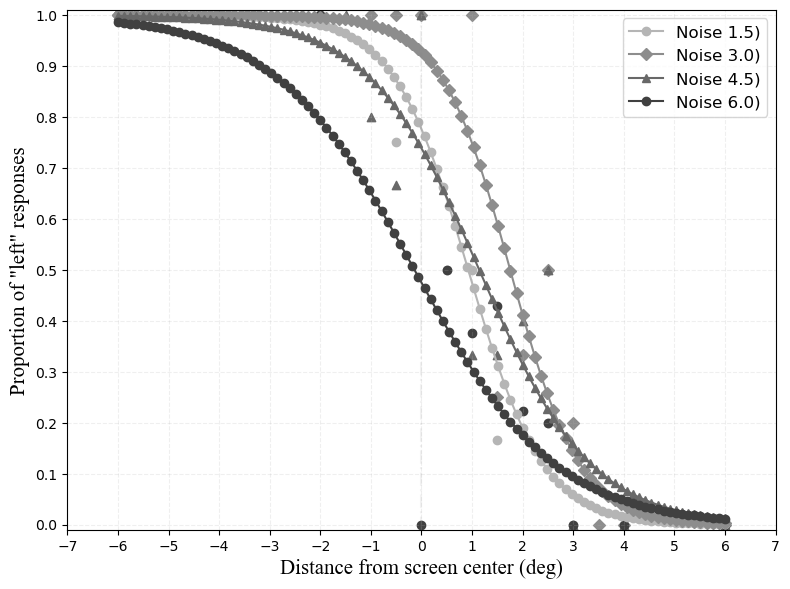

In [50]:
# Define the psychometric function
def psychometric_function(stimulus, PSE, JND):
    return 1 / (1 + np.exp((stimulus - PSE) / JND)) ## threshold, slope = PSE, JND
# def psychometric_function(x, PSE, JND):
#     return 1 / (1 + np.exp((JND * (x - PSE))))
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['subject','noise_lvl', 'PSE', 'JND', 'R-squared', 'RT'])
 
# colors = plt.cm.Greys(np.linspace(0.3, 0.9, len(params)))
# colors = plt.cm.viridis(np.linspace(0, 1, len(params)))
markers = ['o', 's', 'D', '^', 'v']
# Iterate through each participant's data
for elem, data in enumerate(data_l):
    grouped = data.groupby('noise_lvl')

    # Create lists to store the parameters for each noise level
    RT_values = []
    Acc_value = []
    noise_levels = []
    pse_values = []
    jnd_values = []
    r_squared_values = []
    fig, ax = plt.subplots(figsize=(8,6))
#     plt.title(f'Psychometric Curves for Subject {elem }')
    
    unique_noise_levels = sorted(data['noise_lvl'].unique())
    # Create a color scale that maps each noise level to a distinct gray shade
    # Ensure that the first value is dark enough and avoid the end of the colormap which may be too light
    color_scale = np.linspace(0.4, 0.8, len(unique_noise_levels))
    
    # Iterate through each noise level
#     for noise_lvl, data_group in grouped:
    for idx, (noise_lvl, data_group) in enumerate(grouped):
        RT = data_group['RT'].mean()
        Acc = data_group['acc'].mean()
        Acc_value.append(Acc)
        RT_values.append(RT)
        x_data = data_group['slope']
        y_data = data_group['prop_left']
#         colors = plt.cm.Greys(np.linspace(0.3, 0.9, len(params)))
        # Fit the psychometric function to the data
#         popt, _ = curve_fit(psychometric_function, x_data, y_data, p0=(0, 0.1), maxfev=2000, method='lm')
        popt, _ = curve_fit(psychometric_function, x_data, y_data, p0=(0, 0.5), method='trf', bounds=([-np.inf, 0], [np.inf, np.inf]))
#         popt, _ = curve_fit(psychometric_function, x_data, y_data, p0=(0, 1))
        PSE, JND = popt

        # Calculate R-squared
        residuals = y_data - psychometric_function(x_data, PSE, JND)
        ss_residuals = np.sum(residuals**2)
        ss_total = np.sum((y_data - np.mean(y_data))**2)
        r_squared = 1 - (ss_residuals / ss_total)

        noise_levels.append(noise_lvl)
        pse_values.append(PSE)
        jnd_values.append(JND)
        r_squared_values.append(r_squared)
        ### PLOTTING #######
        i = int(noise_lvl)-1
        x_values = np.linspace(min(data_group['slope']), max(data_group['slope']), 100)
        y_values = psychometric_function(x_values, PSE, JND)
#         color = plt.cm.Greys(i/ len(unique_noise_levels))
        color = plt.cm.Greys(noise_lvl / len(data['noise_lvl'].unique()))
        color = plt.cm.Greys(color_scale[idx])
        
#         colors = plt.cm.Greys(np.linspace(0.3, 0.9, len(params)))
        marker = markers[i % len(markers)]
#         label = f'Noise {noise_lvl} (PSE={PSE:.2f}, JND={JND:.2f})'
        label = f'Noise {noise_lvl})'
        ax.plot(x_values, y_values, label=label, color=color, marker=marker, markersize=6)
        ax.scatter(x_data, y_data, color=color, marker=marker,)
    
    plt.ylim(-0.01, 1.01)
    plt.xticks(np.arange(-7, 8, 1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Distance from screen center (deg)', fontsize=15,fontname="Times New Roman")
    plt.ylabel('Proportion of "left" responses', fontsize=15,fontname="Times New Roman")
    plt.axvline(x=0, color='gray', linestyle='-.', alpha=0.1)
#     plt.axhline(y=0.5, color='gray', linestyle='-.', alpha=0.5)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.tight_layout()

    plt.show()   
    # Create a DataFrame for this participant's results
    participant_df = pd.DataFrame({
        'subject':[elem ] * len(noise_levels) ,
        'noise_lvl': noise_levels,
        'PSE': pse_values,
        'JND': jnd_values,
        'R-squared': r_squared_values,
        'RT': RT_values,
        'Acc' :Acc_value
    })
    
    # Append the results to the main DataFrame
    results_df = pd.concat([results_df, participant_df], ignore_index=True)


In [10]:
results_df

,subject,noise_lvl,PSE,JND,R-squared,RT,Acc
0,0,1.5,9.009091e-02,0.216574,0.997336,0.309914,0.893939
1,0,3.0,-1.091234e-01,0.288281,0.945574,0.333749,0.875458
2,0,4.5,-3.004072e-01,0.402754,0.978718,0.404297,0.855556
3,0,6.0,-1.537523e-01,0.213084,0.991752,0.432789,0.891941
4,1,1.5,2.059776e-01,0.958307,0.901790,0.490997,0.837302
5,1,3.0,-1.812751e+00,0.833989,0.862125,0.395334,0.759524
6,1,4.5,-6.464168e-01,0.982879,0.736760,0.575465,0.815385
7,1,6.0,-1.419827e+00,0.796691,0.873819,0.541802,0.723077
8,2,1.5,4.733120e-02,0.043083,1.000000,0.460114,0.909091
9,2,3.0,3.098402e-01,0.309920,0.952990,0.525052,0.856746


In [11]:
# results_df.to_csv(f'exp_fp_result_last.csv', sep=';')

In [12]:
rec = results_df.groupby(['noise_lvl']).mean().round(2).reset_index()

rec.columns.get_level_values(0)
rec

,noise_lvl,PSE,JND,R-squared,RT,Acc
0,1.5,0.20,0.47,0.95,0.45,0.84
1,3.0,0.16,0.62,0.86,0.46,0.80
2,4.5,0.03,0.89,0.85,0.51,0.78
3,6.0,0.12,1.27,0.76,0.53,0.75


In [ ]:
grouped_stats = results_df.groupby(['noise_lvl']).agg({
    'PSE': ['mean', 'std', 'min', 'max'],
    'JND': ['mean', 'std', 'min', 'max'],
    'R-squared': ['mean', 'std', 'min', 'max'],
    'subject': 'count'
}).reset_index()
grouped_stats.columns = ['noise_lvl', 'PSE_mean', 'PSE_std', 'PSE_min', 'PSE_max',
                         'JND_mean', 'JND_std', 'JND_min', 'JND_max',
                         'R-squared_mean', 'R-squared_std', 'R-squared_min', 'R-squared_max',
                         'Count']
grouped_stats

In [ ]:


def plot_psychometric_curves(data_list):
    markers = ['o', 's', 'D', '^', 'v']
    for elem, data in enumerate(data_list):
        grouped_data = data.groupby('noise_lvl')
        fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)  # Three subplots in one row
        plt.suptitle(f'Psychometric Curves for Subject {elem + 1}')

        for ax, (noise_lvl, data_group) in zip(axes, grouped_data):
            x_data = data_group['slope']
            y_data = data_group['prop_left']
            popt, _ = curve_fit(psychometric_function, x_data, y_data, p0=(0, 1), method='trf', bounds=([-np.inf, 0], [np.inf, np.inf]))
            PSE, JND = popt
            x_values = np.linspace(min(data_group['slope']), max(data_group['slope']), 100)
            y_values = psychometric_function(x_values, PSE, JND)
            color = plt.cm.viridis(int(noise_lvl) / len(data['noise_lvl'].unique()))
            marker = markers[int(noise_lvl) % len(markers)]
            label = f'PSE={PSE:.2f}, JND={JND:.2f}'
            ax.plot(x_values, y_values, label=label, color=color, marker=marker, markersize=6)
              
            ax.plot(x_data, y_data, 'o', label='Data', color='k')
            plt.xticks(range(-7, 8, 1))
            plt.yticks(np.arange(0, 1, 0.1))
            ax.axhline(y=0.5, color='gray', linestyle='-.', alpha=1)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.set_title(f'Noise lvl {noise_lvl} PSE={PSE:.2f}, JND={JND:.2f}')
            ax.set_ylabel('Proportion of "left" responses')
#             ax.legend()
#             ax.legend('upper left')
            axes[0].set_ylabel('Proportion of "left" responses')
            axes[1].set_xlabel('Distance from center')
#         axes[2].legend()

        plt.show()

# Example usage:
# plot_psychometric_curves(data_list)


In [ ]:
plot_psychometric_curves(data_l)

###  Function for all participants

In [ ]:
all_data = pd.concat(data_l)
grouped = all_data.groupby(['noise_lvl', 'slope']).agg({'prop_left': 'mean', 'RT': 'mean'}).reset_index()
grouped

In [ ]:

plt.figure(figsize=(8,5))

colors = plt.cm.Greys(np.linspace(0.3, 0.9, len(params)))
# colors = plt.cm.viridis(np.linspace(0, 1, len(params)))
markers = ['o', 's', 'D', '^', 'v']

for (noise_lvl, group), color, markers in zip(grouped.groupby('noise_lvl'), colors,markers):
    x_data = group['slope']
    y_data = group['prop_left']

    popt, _ = curve_fit(psychometric_function, x_data, y_data, p0=[0, 1], bounds=([-np.inf, 0], [np.inf, np.inf]))
    PSE, JND = popt

    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = psychometric_function(x_fit, PSE, JND)
  
    plt.plot(x_fit, y_fit, color=color, marker=markers,label=f'Noise lvl {noise_lvl} (PSE={PSE:.2f}, JND={JND:.2f})', linewidth=2,markevery=5)

plt.xlabel('Distance from screen center (deg)', fontsize=15,fontname="Times New Roman")
plt.ylabel('Proportion of "left" responses', fontsize=15,fontname="Times New Roman")
plt.xticks(np.arange(-7, 8, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
# plt.title('Psychometric Curves for Different Noise Levels', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()

# plt.savefig('/path/to/save/psychometric_curves.png', dpi=300)

plt.show()

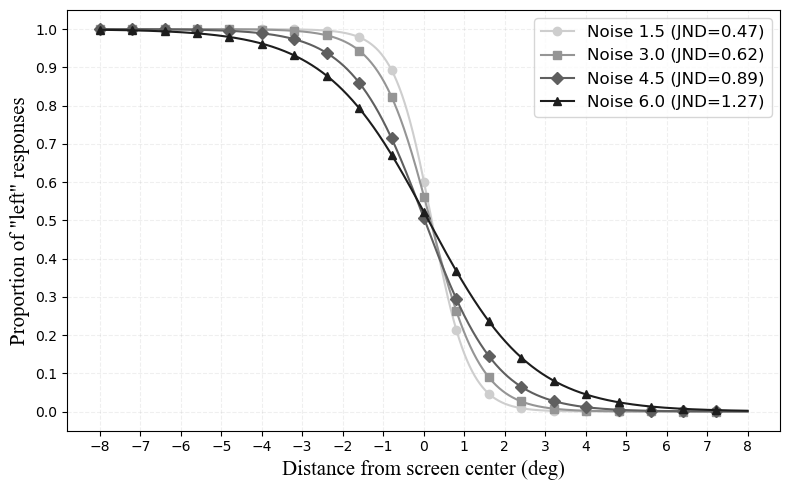

In [28]:
# Параметры для разных уровней шума
params = {
    1.5: {"PSE": 0.197660, "JND": 0.467026},
    3.0: {"PSE": 0.163290, "JND": 0.622980},
    4.5: {"PSE": 0.025568, "JND": 0.893082},
    6.0: {"PSE": 0.115320, "JND": 1.271515},
}
colors = plt.cm.Greys(np.linspace(0.3, 0.9, len(params)))
# colors = plt.cm.viridis(np.linspace(0, 1, len(params)))
markers = ['o', 's', 'D', '^', 'v']

# Создание графика
plt.figure(figsize=(8, 5))

x_values = np.linspace(-8, 8, 1000)
for idx, (noise_lvl, param) in enumerate(params.items()):
    y_values = psychometric_function(x_values, param["PSE"], param["JND"])
#     plt.plot(x_values, y_values, color=colors[idx], marker=markers[idx % len(markers)], markevery=50, 
#              label=f'Noise {noise_lvl} (PSE={param["PSE"]:.2f}, JND={param["JND"]:.2f})')
    plt.plot(x_values, y_values, color=colors[idx], marker=markers[idx % len(markers)], markevery=50, 
             label=f'Noise {noise_lvl} (JND={param["JND"]:.2f})')

plt.xlabel('Distance from screen center (deg)', fontsize=15,fontname="Times New Roman")
plt.ylabel('Proportion of "left" responses', fontsize=15,fontname="Times New Roman")
plt.xticks(np.arange(-8, 9, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
# plt.title('Psychometric Curves for Different Noise Levels', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()